In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.measurement.io import readoutnc

In [3]:
rnc = readoutnc.ReadoutNetCDF('/artemis/readout/2016-03-01_103311_cw_noise_test.nc')

In [4]:
fr,s21,err = rnc.sweep_20160301103524.select_by_index(7)

In [5]:
fr.mean()

1108.58984375

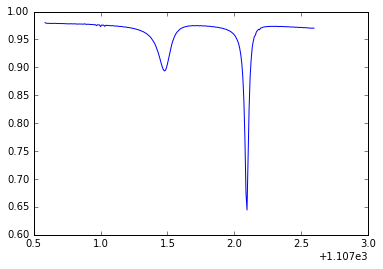

In [6]:
plot(fr,np.abs(s21))

In [7]:
import kid_readout.analysis.resonator.lmfit_resonator as resonator

In [8]:
from kid_readout.analysis.resonator import lmfit_models

In [9]:
model = ((lmfit_models.GeneralCableModel()
                                                       * lmfit_models.LinearResonatorModel(prefix='bg_'))
                                                      * lmfit_models.LinearResonatorModel())

In [10]:
res = resonator.CollidingLinearResonatorsWithCable(frequency=fr*1e6,s21=s21,errors=err)

In [11]:
res.fit()

In [13]:
res.fit()

In [14]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', -3.1299454785247621e-05, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', 1.7682890205581314, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=1107585937.5 (fixed), bounds=[-inf:inf]>),
            ('A_mag',
             <Parameter 'A_mag', 0.98249640686523287, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -6.5173348749623353e-09, bounds=[-inf:inf]>),
            ('bg_f_0',
             <Parameter 'bg_f_0', 1109092894.8933589, bounds=[1107585937.5:1109593750.0]>),
            ('bg_Q',
             <Parameter 'bg_Q', 30255.147775339119, bounds=[55.238910505836579:141964.0]>),
            ('bg_Q_e_real',
             <Parameter 'bg_Q_e_real', 88681.71150522797, bounds=[0:10000000.0]>),
            ('bg_Q_e_imag',
             <Parameter 'bg_Q_e_imag', 8624.6449450682849, bounds=[-10000000.0:10000000.0]>),
            ('f

In [15]:
res.model

<lmfit.Model: ((Model(general_cable) * Model(linear_resonator, prefix='bg_')) * Model(linear_resonator, prefix='fg_'))>

In [16]:
s21c = res.remove_background(fr,s21)

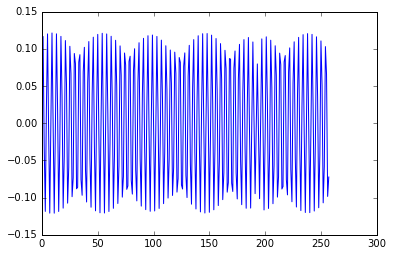

In [17]:
plot(s21c)

In [18]:
res.model.right

<lmfit.Model: Model(linear_resonator, prefix='fg_')>

In [19]:
res.model.left.right

<lmfit.Model: Model(linear_resonator, prefix='bg_')>

In [20]:
res.model.right.make_funcargs(params=res.current_params)

{'Q': 10471.540426060639,
 'Q_e_imag': 32221.501712383702,
 'Q_e_real': 116653.60833593263,
 'f_0': 1108486149.6404414}

In [24]:
res.model.left.right.make_funcargs(params=res.current_params,strip=True)

{'Q': 30255.147775339119,
 'Q_e_imag': 8624.6449450682849,
 'Q_e_real': 88681.71150522797,
 'f_0': 1109092894.8933589}

In [27]:
s21c = res.remove_background(frequency=fr*1e6,s21_raw=s21)

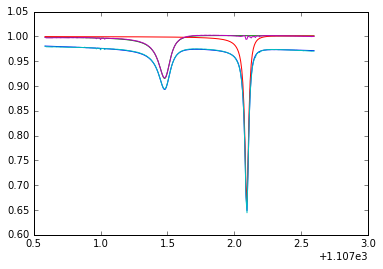

In [28]:
plot(fr,np.abs(res.model.eval(f=fr*1e6,params=res.current_params)))
plot(fr,np.abs(res.model.right.eval(f=fr*1e6,params=res.current_params)))
plot(fr,np.abs(res.model.left.right.eval(f=fr*1e6,params=res.current_params)))

plot(fr,np.abs(s21))
plot(fr,np.abs(s21c))
